<a href="https://colab.research.google.com/github/sumedhk230/OIBSIP_Task5/blob/main/Sales_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Name - Sumedh Kulkarni**
# **College - Vishwakarma Institute of Inforamtion Technology**
# **Task 5 - Sales Price Prediction using Python**

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [49]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [50]:
df.shape

(200, 5)

In [51]:
# Dropping the column named unnamed: 0
df = df.drop(columns=['Unnamed: 0'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [52]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [53]:
df.shape

(200, 4)

In [54]:
# check whether the data set contains null or redundant values

df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

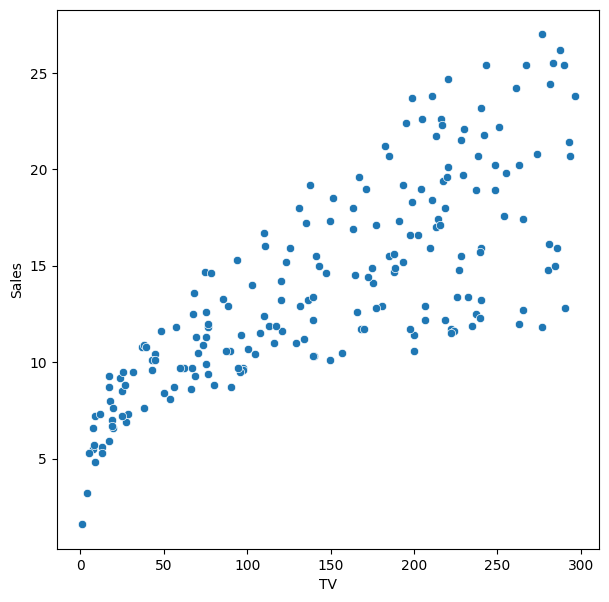

In [55]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x=df['TV'],y=df['Sales'])
plt.show()

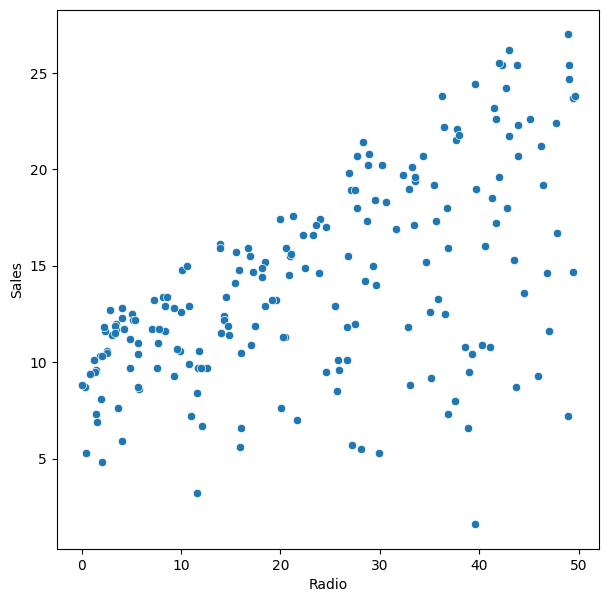

In [56]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x=df['Radio'],y=df['Sales'])
plt.show()

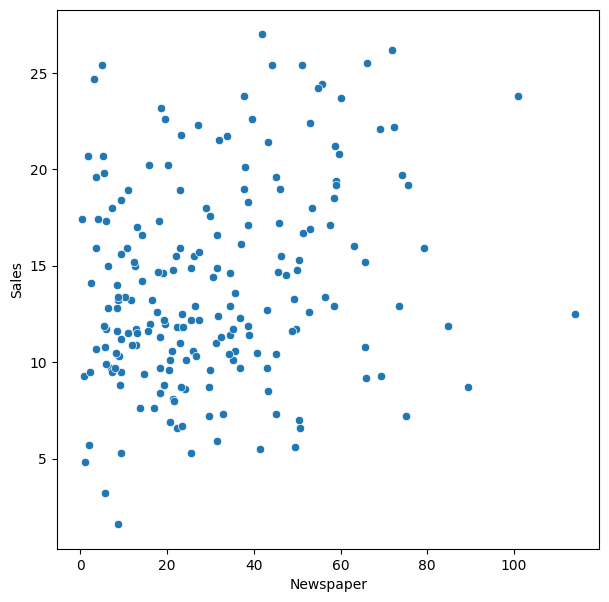

In [57]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df,x=df['Newspaper'],y=df['Sales'])
plt.show()

<ipython-input-65-4b1fd2999335>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Sales,bins=10,color="black",hist=True)


<Axes: xlabel='Sales', ylabel='Density'>

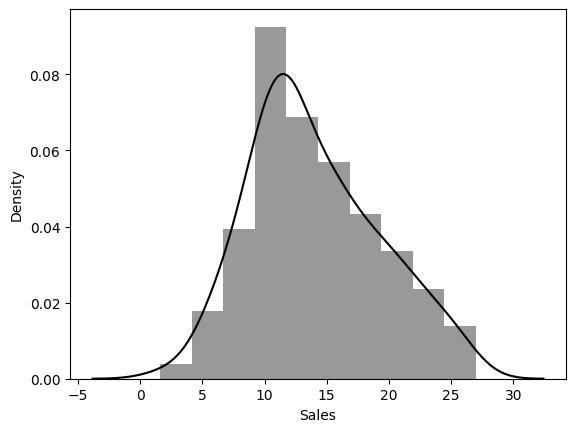

In [65]:
sns.distplot(df.Sales,bins=10,color="black",hist=True)

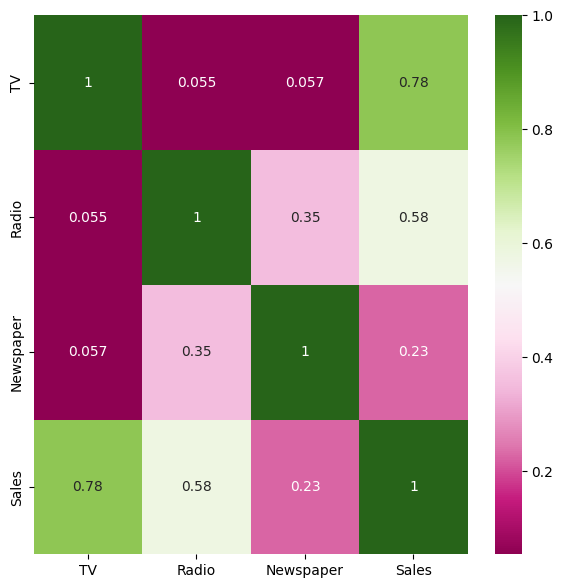

In [30]:
# Creating correlation matrix using seaborn heatmap to show correlation between the sales of TV, Radio and Newspaper
plt.figure(figsize = (7,7))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='PiYG')
plt.show()


In [33]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [34]:
# Lets begin with training and testing phase of the model

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
Sc=StandardScaler()

In [35]:
# Scaling the model

x_train_scaled=Sc.fit_transform(x_train)
x_test_scaled=Sc.fit_transform(x_test)
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [37]:
# Evaluating the model after the training and testing Phase using Linear Regression
# We have achieved an Accuracy of 88.63% for the following model

lr.fit(x_train_scaled,y_train)
LinearRegression()
y_pred=lr.predict(x_test_scaled)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8863195562008255

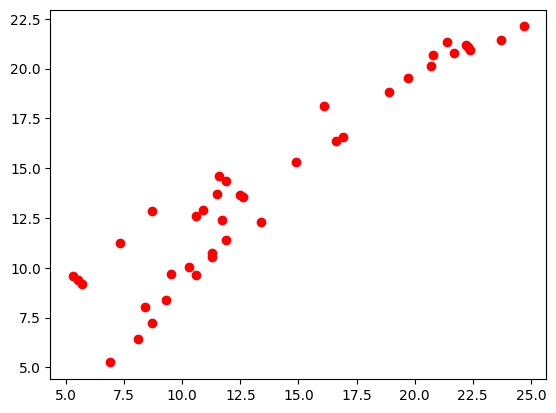

In [75]:
# A scatter plot to depict the accuracy of the model
plt.scatter(y_test,y_pred,c='r')